In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


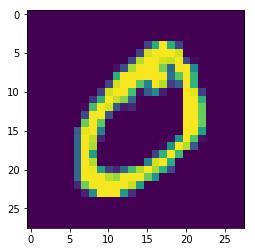

In [115]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [120]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [121]:
from keras.layers import Activation
from keras import regularizers

model = Sequential()

lambda_val = 0.01
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1), kernel_regularizer=regularizers.l2(lambda_val))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=regularizers.l2(lambda_val))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=regularizers.l2(lambda_val))) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(lambda_val)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(lambda_val)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(lambda_val)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(lambda_val)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, kernel_regularizer=regularizers.l2(lambda_val)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_64 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_52 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_65 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_53 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


In [122]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# HyperParameters
lr = 0.003
batch_size = 128
epochs = 40

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

train_iterator = datagen.flow(X_train, Y_train, batch_size=batch_size)
val_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)

model.fit_generator(train_iterator, steps_per_epoch=len(X_train)/batch_size, validation_data=val_iterator, validation_steps=len(X_test)//batch_size, epochs=epochs, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 17s 37ms/step - loss: 0.8915 - acc: 0.8508 - val_loss: 1.6645 - val_acc: 0.5387

Epoch 00001: val_acc improved from -inf to 0.53866, saving model to best_weights.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 9s 19ms/step - loss: 0.3533 - acc: 0.9197 - val_loss: 0.1837 - val_acc: 0.9810

Epoch 00002: val_acc improved from 0.53866 to 0.98096, saving model to best_weights.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 9s 19ms/step - loss: 0.2957 - acc: 0.9332 - val_loss: 0.1929 - val_acc: 0.9768

Epoch 00003: val_acc did not improve from 0.98096
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 9s 19ms/step - loss: 0.26

In [160]:
model.load_weights("best_weights.hdf5")
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

val_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)
score = model.evaluate_generator(val_iterator, steps=len(X_test)/batch_size, verbose=0)

print(score)

[0.04633838073015213, 0.9944]


In [204]:
val_iterator = datagen.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)

Y_pred = model.predict_generator(val_iterator, steps=len(X_test)/batch_size)

Y_pred_actual = np.argmax(Y_pred, axis=1)
Y_test_actual = np.argmax(Y_test, axis=1)

misclassified_indices = []
for i in range(len(Y_pred_actual)):
  if Y_pred_actual[i] != Y_test_actual[i]:
    misclassified_indices.append(i)
print("Total Mis-classified Images: ", len(misclassified_indices))

Total Mis-classified Images:  56


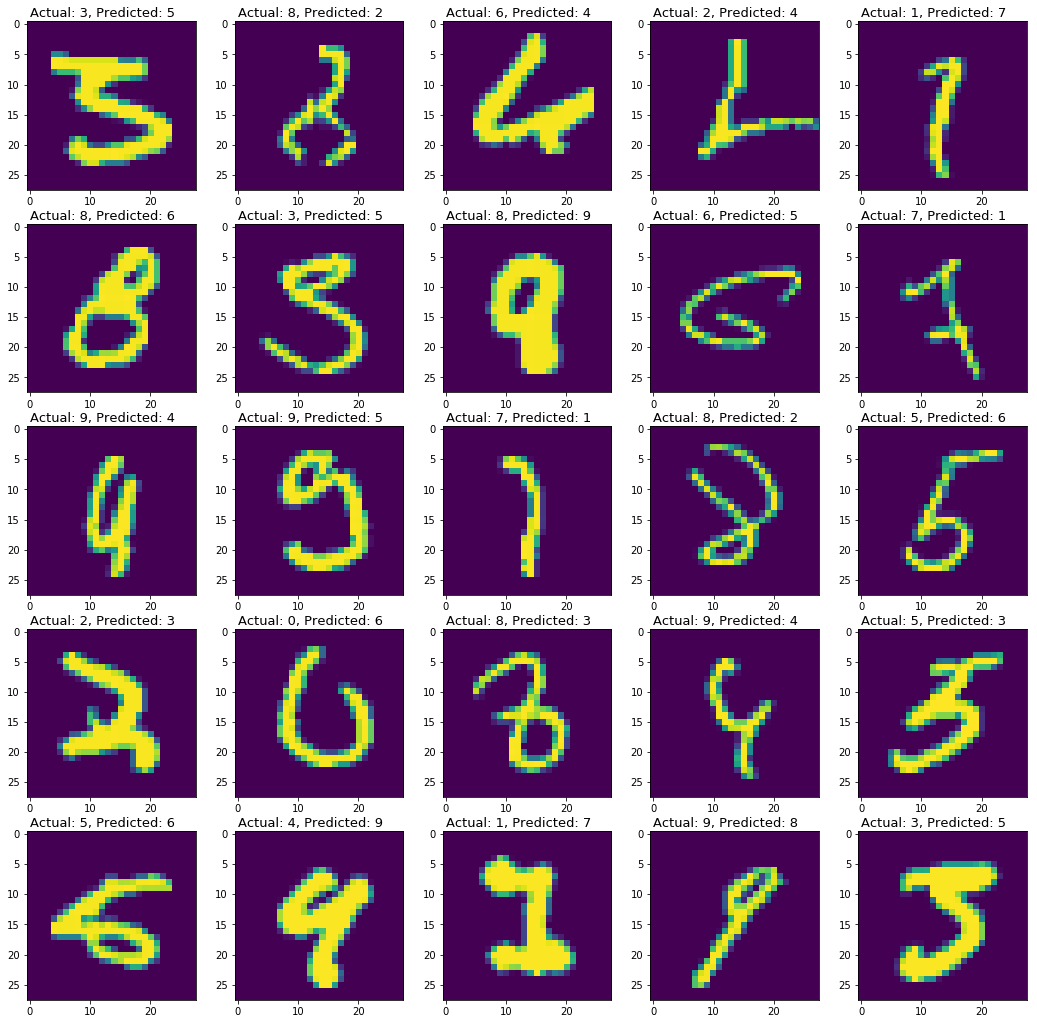

In [205]:
from matplotlib import pyplot as plt
%matplotlib inline

w=28
h=28
fig=plt.figure(figsize=(18, 18))
columns = 5
rows = 5
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    index = misclassified_indices[i]
    plt.imshow(X_test[index].reshape(w, h))
    annotation = "Actual: %d, Predicted: %d" % (Y_test_actual[index], Y_pred_actual[index])
    plt.annotate(annotation, xy=(0,0), xytext=(0,-1.2), fontsize=13)
plt.show()